# Python Basketball-Reference
A notebook depicting a recreation of your basketball-reference ipynb

I'm missing all of your analysis info, but I just wanted to use this as a practice in data manipulation and presentation. It was a ton of fun, thanks for the guidelines!

First import some useful libraries for dataframes and plotting

In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import display

# Gather and clean Data
Data is read from html into a dataframe

In [2]:
def clean_data(url):
    df = pd.read_html(url)[0]
    df = df.drop(len(df)-1) \
            .dropna(how='all', axis=1) \
            .dropna()
    return df

url_dict = {'Jordan': 'https://www.basketball-reference.com/players/j/jordami01.html',
        'Kobe': 'https://www.basketball-reference.com/players/b/bryanko01.html',
        'Lebron': 'https://www.basketball-reference.com/players/j/jamesle01.html'}

df_dict = {player: clean_data(url) for player, url in url_dict.items()}
df = pd.concat(df_dict, names=['Player', 'Player_Season_ID']) \
        .eval('Rebounds = ORB + DRB', inplace=False) \
        .reset_index()

display(df.head(), df.tail())

,Player,Player_Season_ID,Season,Age,Tm,Lg,Pos,G,GS,MP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Rebounds
0,Jordan,0,1984-85,21.0,CHI,NBA,SG,82.0,82.0,38.3,...,2.0,4.5,6.5,5.9,2.4,0.8,3.5,3.5,28.2,6.5
1,Jordan,1,1985-86,22.0,CHI,NBA,SG,18.0,7.0,25.1,...,1.3,2.3,3.6,2.9,2.1,1.2,2.5,2.6,22.7,3.6
2,Jordan,2,1986-87,23.0,CHI,NBA,SG,82.0,82.0,40.0,...,2.0,3.2,5.2,4.6,2.9,1.5,3.3,2.9,37.1,5.2
3,Jordan,3,1987-88,24.0,CHI,NBA,SG,82.0,82.0,40.4,...,1.7,3.8,5.5,5.9,3.2,1.6,3.1,3.3,35.0,5.5
4,Jordan,4,1988-89,25.0,CHI,NBA,SG,81.0,81.0,40.2,...,1.8,6.2,8.0,8.0,2.9,0.8,3.6,3.0,32.5,8.0


,Player,Player_Season_ID,Season,Age,Tm,Lg,Pos,G,GS,MP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Rebounds
44,Lebron,9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,37.9,...,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8,8.1
45,Lebron,10,2013-14,29.0,MIA,NBA,PF,77.0,77.0,37.7,...,1.1,5.9,6.9,6.3,1.6,0.3,3.5,1.6,27.1,7.0
46,Lebron,11,2014-15,30.0,CLE,NBA,SF,69.0,69.0,36.1,...,0.7,5.3,6.0,7.4,1.6,0.7,3.9,2.0,25.3,6.0
47,Lebron,12,2015-16,31.0,CLE,NBA,SF,76.0,76.0,35.6,...,1.5,6.0,7.4,6.8,1.4,0.6,3.3,1.9,25.3,7.5
48,Lebron,13,2016-17,32.0,CLE,NBA,SF,74.0,74.0,37.8,...,1.3,7.3,8.6,8.7,1.2,0.6,4.1,1.8,26.4,8.6


Restructure our data into long format, and create a barplot for each of the statistics

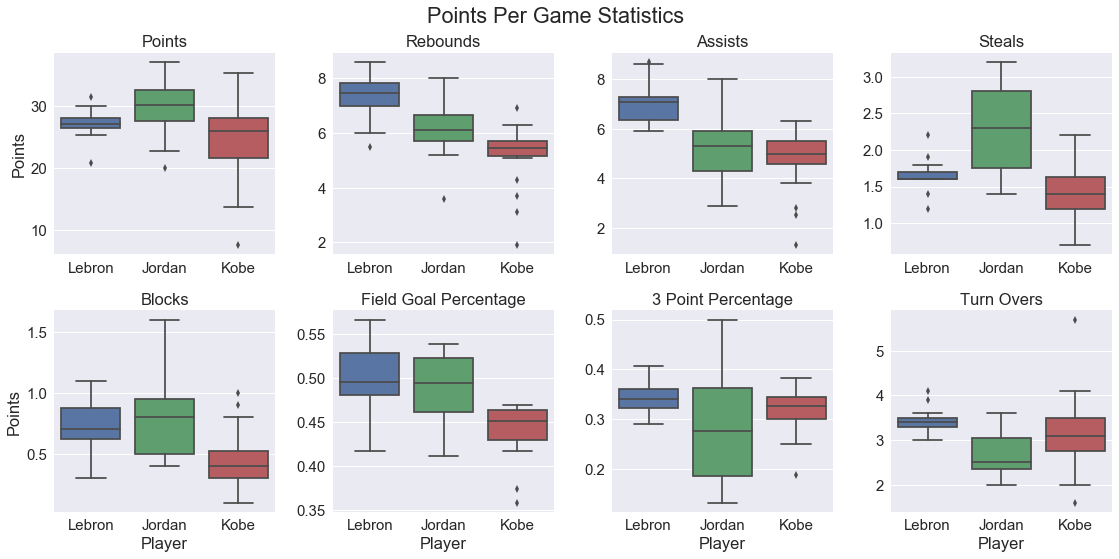

In [3]:
%matplotlib inline

order = ['Lebron', 'Jordan', 'Kobe']
dist_plot_rename = {'PTS': 'Points',
                    'Rebounds': 'Rebounds',
                    'AST': 'Assists',
                    'STL': 'Steals',
                    'BLK': 'Blocks',
                    'FG%': 'Field Goal Percentage',
                    '3P%': '3 Point Percentage',
                    'TOV': 'Turn Overs'
                    }

dist_plot_cols = list(dist_plot_rename.keys())
dist_plot_data = pd.melt(df, id_vars='Player', value_vars=dist_plot_cols,
                         var_name='Statistic', value_name='Points')
dist_plot_data['Statistic'] = dist_plot_data['Statistic'].map(dist_plot_rename)

sns.set(font_scale=1.5)
g = sns.factorplot(kind='box', x='Player', y='Points', data=dist_plot_data, order=order,
                   sharey=False, sharex=False, col='Statistic', col_wrap=4)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Points Per Game Statistics')
g.set_titles('{col_name}')


Create seperate grids to show a breakdown of 3 pointer statistics

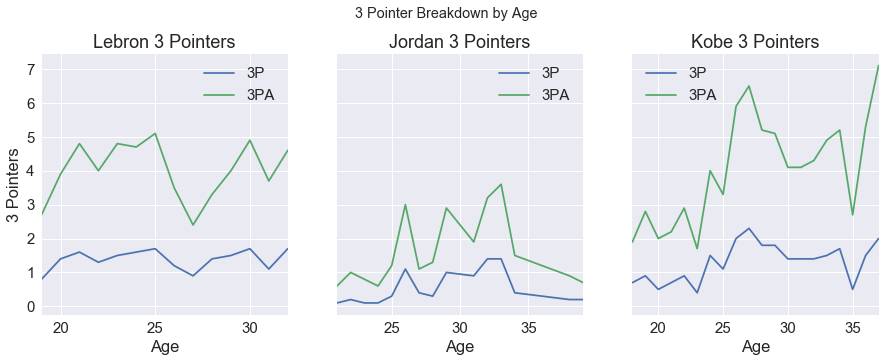

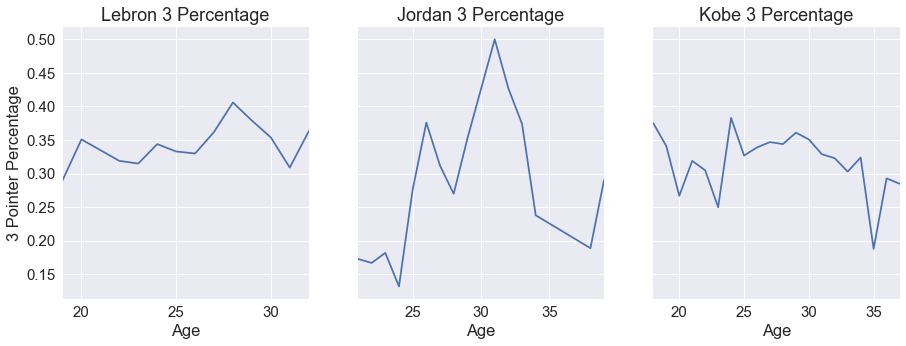

In [4]:
%matplotlib inline

f, axes = sns.plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=False)
f.subplots_adjust(top=0.85)
f.suptitle('3 Pointer Breakdown by Age', family='Arial', size='x-large')

for ax, player in zip(axes, order):
    plot_df = df.query('Player == @player')

    plot_df.plot('Age', '3P', ax=ax)
    plot_df.plot('Age', '3PA', ax=ax)
    ax.set_title(f'{player} 3 Pointers')
    ax.set_ylabel('3 Pointers')

f, axes = sns.plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=False)
for ax, player in zip(axes, order):
    plot_df = df.query('Player == @player')
    plot_df.plot('Age', '3P%', ax=ax, legend=False)
    ax.set_title(f'{player} 3 Percentage')
    ax.set_ylabel('3 Pointer Percentage')

Create a plot that tracks steals and blocks pergame for each season

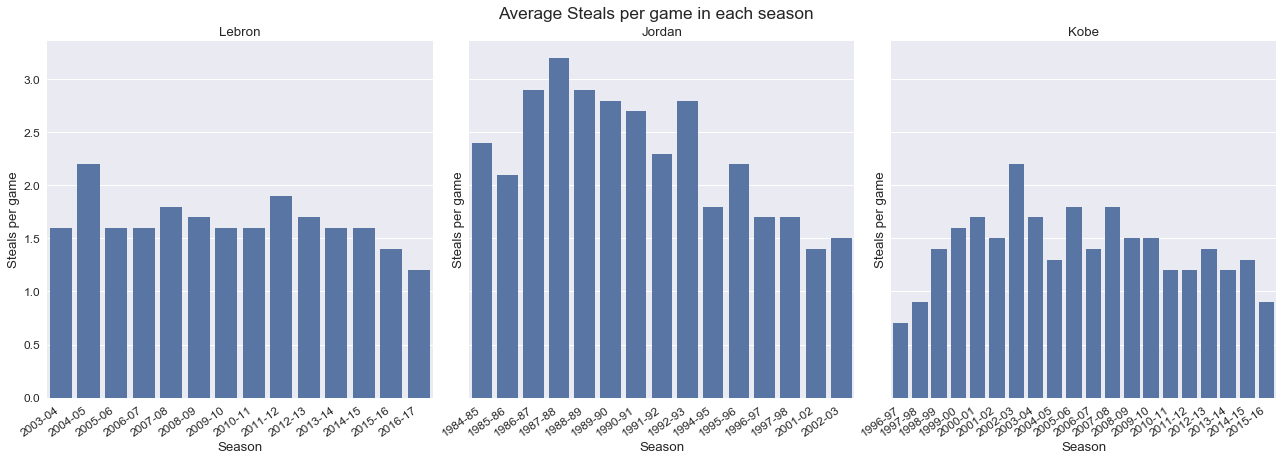

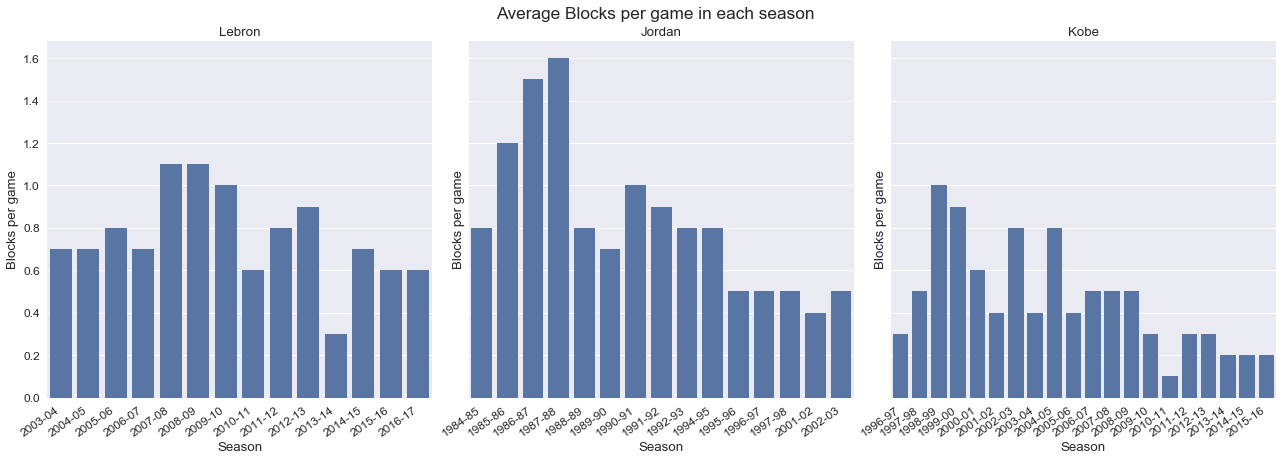

In [5]:
def rotate_labels(fg):
    for ax in fg.axes.flatten():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')
        ax.set_xlabel('Season')

sns.set(font_scale=1.2)
for stat, label in [('STL', 'Steals'), ('BLK', 'Blocks')]:
    fg = sns.FacetGrid(df, col='Player', col_order=order,
                   sharex=False, size=6)
    fg.map_dataframe(sns.barplot, x='Season', y=stat)
    rotate_labels(fg)
    fg.set_titles('{col_name}')
    fg.set(ylabel=f'{label} per game')
    
    fg.fig.subplots_adjust(top=0.9)
    fg.fig.suptitle(f'Average {label} per game in each season')

